Original File at : https://colab.research.google.com/drive/1uTKYh520DsjjYoOZaJ0MXoYft7B-clUt 

Please refer this, in case graphs doesn't load.

# **Lab 4**
### Weightage **4%**
# SVM
---
Datasets used: 



1.   Synthetic 2D Datasets
2.   COMPAS Recidivism Dataset



---

Maximum Points in the Lab: **75**

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **April 21st 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In [0]:
# Import the necessary libraries
import sklearn
from sklearn.datasets import make_blobs,make_circles,make_moons
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as lcmap
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd 
import os
import seaborn as sns

In [0]:
# If COMPAS dataset is to be loaded from Google Drive, use this cell
# If running on local system, remove / comment this block

# from google.colab import drive
# drive.mount('/content/MyDrive', force_remount = True)


In [18]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/MachineLearning/lab4

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/MachineLearning/lab4


# SVM

---

In this lab you will be using one of the most powerful machine learning models namely Support Vector Machines (SVM) to classify the level of risk associated with granting bail to a person. But before diving into the analysis of this high dimensional real world dataset, we will be doing analyses on low dimensional synthetic datasets with 2 classes for a better understanding. 

# Synthetic Dataset


---

We will first take synthetic 2D datasets to help you visualize and understand how SVM works.

# Helpers

## Preparing for visualization


---

The following block guides you to color code data points in your plots and display the legend as per predicted and true labels. Insert the necessary information as asked in the comments.


---
**2 Points**

---




In [0]:
# Insert different colors of your choice here
color_1 = "red"
color_2 = "green"
color_3 = "blue"
color_4 = "orange"

# Insert different matplotlib markers of your choice here
train_set_marker = "x"
test_set_marker = 'o'

# This dictionary shall be used to color code the points and display legend in plots
colors_info = {color_1 : "class 0 and predicted as 0",
               color_2 : "class 0 and predicted as 1",
                color_3 : "class 1 and predicted as 0",
                color_4    : "class 1 and predicted as 1"}

c_vals = [0.01,0.1,1,10,100]

## Coloring the data points - Custom function

---

Color coding the data points as per their true and predicted labels in the visualization shall give an idea of the way the SVM model perceives the distribution of data points. The following function definition shall be reused to color code the different data points appropriately.


---
**3 Points**

---




In [0]:
def get_color(pred_label,true_label):
    # Insert your code here to return corresponding color as per the predicted and true label
    if (pred_label ==0) & (true_label ==0):
        return color_1
    if (pred_label ==1) & (true_label ==0):
        return color_2
    if (pred_label ==0) & (true_label ==1):
        return color_3
    if (pred_label ==1) & (true_label ==1):
        return color_4    

    

## Customised scatter plot

---
We have different types of markers based on whether the data point was in the training set or test set. The following function definition is to create such customised scatter plots.


---
**2 Points**

---





In [0]:
def plot_colored_scatter_plot(plot_x_axis,plot_y_axis,color_values,marker_type):
    plt.scatter(plot_x_axis,plot_y_axis,c=color_values,marker=marker_type)
    return plt
    # Insert your code here to generate a customized scatter plot as per given color and marker type
    

## Plotting decision function

---
The following custom function is to plot the decision function learned by the SVM classifier. The decision boundary is to be plotted via bold line and the margins are to be plotted via dotted / dashed lines. The support vectors are to be encircled.


---
**10 Points**

---





In [0]:
def plot_svc_decision_function(svm_model,color,X,y):

    # Insert your code here to get the complete legend ready
    pred = svm_model.predict(X)
    plt = plot_colored_scatter_plot(X[:,0],X[:,1],color,train_set_marker)
    
    
    # Insert your code here to create a grid to plot the data points
    ax = plt.gca()
    x_lim1, x_lim2 = ax.get_xlim()
    y_lim1, y_lim2 = ax.get_ylim()
    x1 = np.linspace(x_lim1,x_lim2) #evenly spaced samples
    y1 = np.linspace(y_lim1,y_lim2)
    yy, xx = np.meshgrid(y1, x1)
    xy = np.vstack([xx.reshape(-1), yy.reshape(-1)]).T
    
   

    # Insert your code here to get the decision boundary function from the SVM model object (svm_model) 
    Z = svm_model.decision_function(xy).reshape(xx.shape) #Evaluates the decision function for the samples
    

    # Insert your code here to plot the decision boundary and margins
    ax.contour(xx, yy, Z, levels=[-1,0,1], alpha=0.5)
    
    

    # Insert your code here to encircle support vectors in the scatter plot
    ax.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], linewidth=1, facecolors='none', edgecolors='k')
    
    
    
    # Insert your code here to show the plot along with the prepared legend.
    markers = [Line2D([0,0], [0,0], color=c, marker='^') for c in colors_info.keys()]
    plt.legend(markers, colors_info.values())
    plt.show()
    # For a cleaner view, it is recommended that you display the legend in a 2 x 2 grid
    

In [0]:
def get_color_list (pred_list, true_list ) :
    returnList = []
    for i in range(len(pred_list)):
        returnList.append(get_color(pred_list[i], true_list[i]))
    return returnList

# Working on the synthetic dataset with SVM classifier

---
Till now the functions you have defined shall be used as helper functions for this section. This is the place where you actually start training the SVM and apply it for classification. Follow the comments for step by step procedure.


---

**10 Points**

---




In [0]:
def apply_svm_classifier(X,Y,kernel_type,regularization_constant = 1):
    # Insert your code here to split the dataset into train and test sets
    # Keep 20% of the data as the test set
    X_train, X_test , y_train, y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 42)

    # Insert your code here to create a SVM classifier object with the given kernel and regularization settings
    svm_classifier = SVC( C = regularization_constant, kernel= kernel_type )

    # Insert your code here to train the SVM classifier on the train set 
    svm_classifier.fit(X_train,y_train)
    

    # Insert your code here to get the labels from the SVM classifier for train set
    y_pred_train = svm_classifier.predict(X_train)    

    # Insert your code here to get the labels from the SVM classifier for test set
    y_pred_test = svm_classifier.predict(X_test)

    # Insert your code here to display the confusion matrix as per the SVM classifier's predictions on the train set
    confusion_matrix_train = confusion_matrix(y_train, y_pred_train, labels = [0,1])
    print("Confusion Matrix - Train Set")
    print(confusion_matrix_train)

    # Insert your code here to display the confusion matrix as per the SVM classifier's predictions on the test set
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test, labels = [0,1])
    print("Confusion Matrix - Test Set")
    print(confusion_matrix_test)
    
    # Insert your code here to get color code values for data points as per their predicted and true labels
    color_test = get_color_list(y_pred_test, y_test)
    color_train = get_color_list(y_pred_train, y_train)


    print('Training set')
    plt_train = plot_colored_scatter_plot(X_train[:,0], X_train[:,1], color_train, train_set_marker)
    markers = [Line2D([0,0], [0,0], color=c, marker='^') for c in colors_info.keys()]
    plt_train.legend(markers, colors_info.values())
    plt_train.show()
    

    # Insert your code here to generate a colored scatter plot of the test data points
    print('Test set')
    plt_test = plot_colored_scatter_plot(X_train[:,0], X_train[:,1], color_train, test_set_marker)
    markers = [Line2D([0,0], [0,0], color=c, marker='^') for c in colors_info.keys()]
    plt_test.legend(markers, colors_info.values())
    plt_test.show()
    

    # Insert your code here to initiate the function call to plot the decision function
    plot_svc_decision_function(svm_classifier, color_train, X_train, y_train)    
    


# Creating Synthetic datasets

## Linearly separable dataset

---

First, let us create a linearly separable dataset with 2 classes. To facilitate this `make_blobs()` in `sklearn` package is provided. By suitabling adjusting the function parameters generate a linearly separable dataset and show a scatter plot of the generated data color coded as per true labels.


---

**2 Points**


---



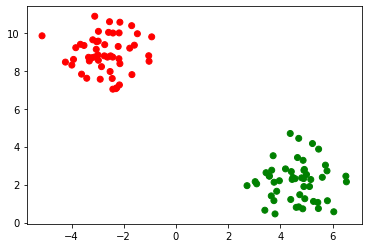

In [25]:
# Insert your code here to generate perfectly linearly separable data points
X, Y = make_blobs(centers=2, random_state=42)

# Insert your code to initiate the function call to generate colored scatter plot of the dataset
colors = list()
for i in range(len(Y)):
    colors.append(color_1 if (Y[i]==0) else color_2)
plt = plot_colored_scatter_plot(X[:,0], X[:,1] , colors, 'o')


### Applying SVM

---

Apply SVM with linear kernel to classify the synthetic linearly separable dataset.

---
**1 Point**

---




Confusion Matrix - Train Set
[[39  0]
 [ 0 41]]
Confusion Matrix - Test Set
[[11  0]
 [ 0  9]]
Training set


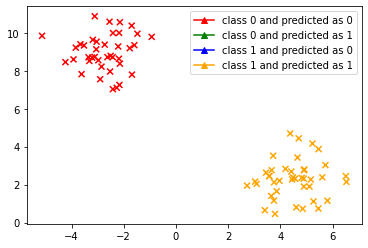

Test set


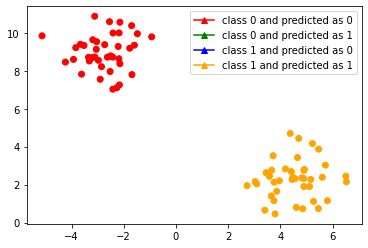

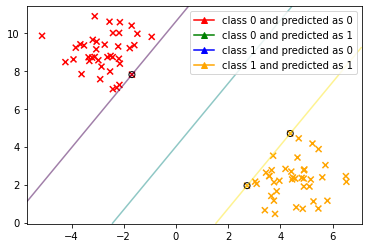

In [26]:
# Insert your code here to apply a SVM classifier with Linear Kernel
apply_svm_classifier(X,Y , 'linear')


## Circular separable dataset

---

Now, let us create a circular separable dataset with 2 classes. To facilitate this `make_circles()` in `sklearn` package is provided. By suitabling adjusting the function parameters generate a circular separable dataset and show a scatter plot of the generated data color coded as per true labels.


---

**2 Points**


---



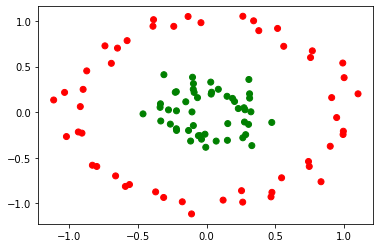

In [27]:
# Insert your code here to generate perfectly circular separable data points
X, Y  = make_circles(random_state=42, factor = 0.3, noise = 0.07)

# Insert your code to initiate the function call to generate colored scatter plot of the dataset
colors = list()
for i in range(len(Y)):
    colors.append(color_1 if (Y[i]==0) else color_2)
plt = plot_colored_scatter_plot(X[:,0], X[:,1] , colors, 'o')


### Applying SVM

---

Apply SVM with linear kernel to classify the synthetic circular separable dataset.

---
**1 Point**

---




Confusion Matrix - Train Set
[[ 0 36]
 [ 0 44]]
Confusion Matrix - Test Set
[[ 0 14]
 [ 0  6]]
Training set


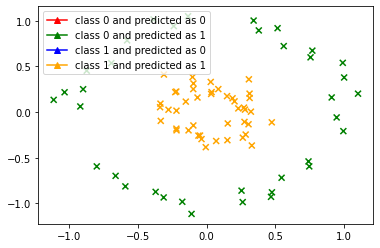

Test set


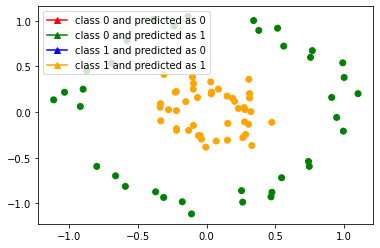

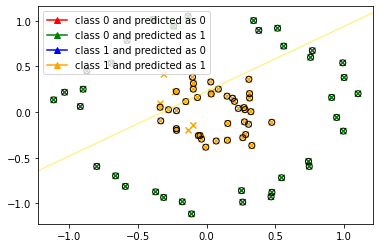

In [28]:
# Insert your code here to apply a SVM classifier with Linear Kernel
apply_svm_classifier(X,Y , 'linear')

## RBF Kernel

---

As expected an SVM with linear kernel cannot model the true circular boundary well. To model circular boundary RBF kernel is to be applied. Apply SVM with RBF kernel to classify the synthetic circular separable dataset.

---
**1 Point**

---


Confusion Matrix - Train Set
[[36  0]
 [ 0 44]]
Confusion Matrix - Test Set
[[14  0]
 [ 0  6]]
Training set


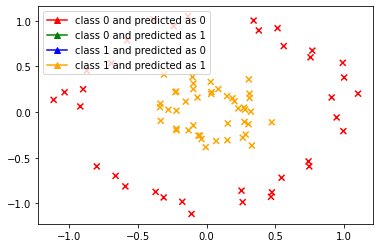

Test set


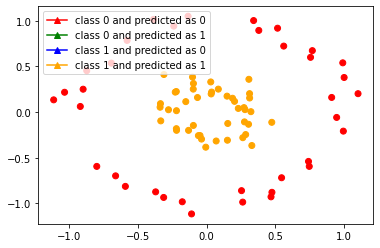

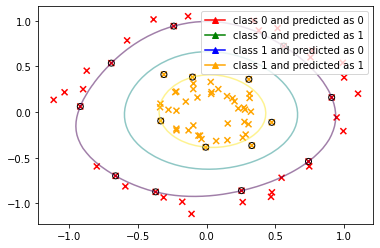

In [29]:
# Insert your code here to apply a SVM classifier with RBF Kernel
apply_svm_classifier(X,Y , 'rbf')

## Inference from support vectors

---

**Comment** on what you infer from the support vectors.



---

 **2 Points**
 
---




## Experimenting with regularization constants

---
You have a parameter `C` in the SVM classifier of the `sklearn` package that helps adjust regularization weight. Experiment on various values for this parameter and **comment** your observations.


---

**2 Points**


---



C Value :  0.01
Confusion Matrix - Train Set
[[ 0 36]
 [ 0 44]]
Confusion Matrix - Test Set
[[ 0 14]
 [ 0  6]]
Training set


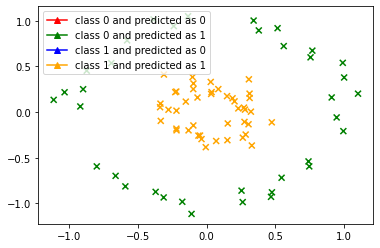

Test set


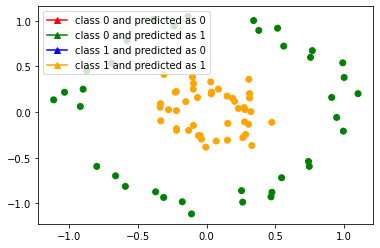

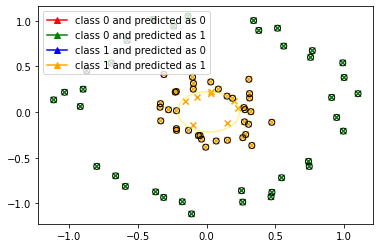

-----------------------------------------------------
C Value :  0.1
Confusion Matrix - Train Set
[[36  0]
 [ 0 44]]
Confusion Matrix - Test Set
[[14  0]
 [ 0  6]]
Training set


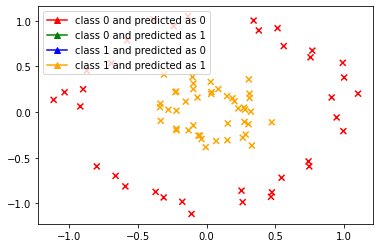

Test set


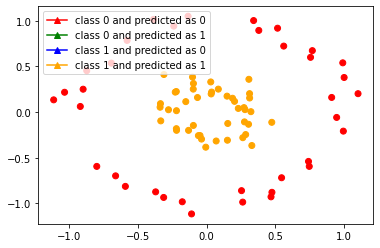

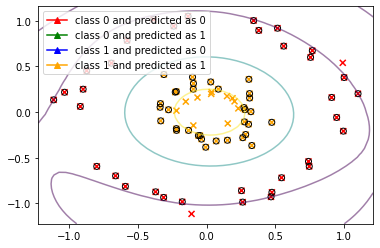

-----------------------------------------------------
C Value :  1
Confusion Matrix - Train Set
[[36  0]
 [ 0 44]]
Confusion Matrix - Test Set
[[14  0]
 [ 0  6]]
Training set


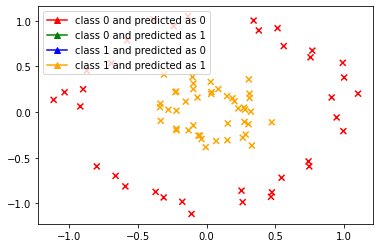

Test set


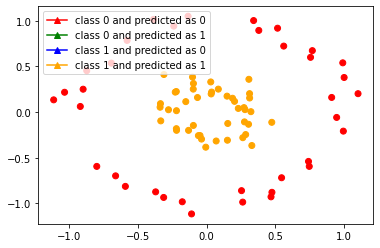

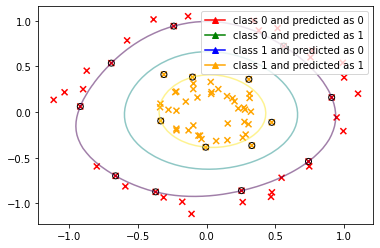

-----------------------------------------------------
C Value :  10
Confusion Matrix - Train Set
[[36  0]
 [ 0 44]]
Confusion Matrix - Test Set
[[14  0]
 [ 0  6]]
Training set


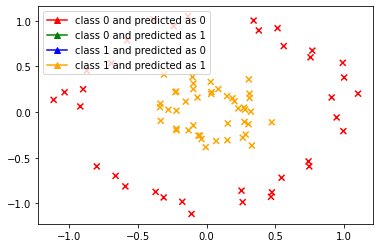

Test set


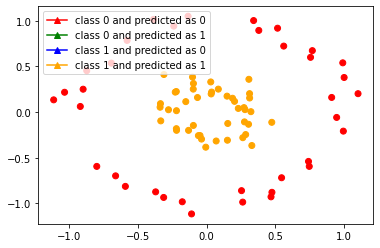

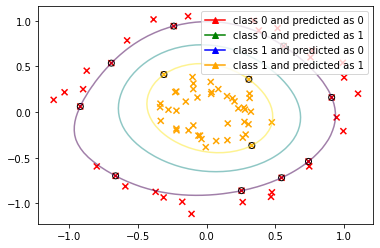

-----------------------------------------------------
C Value :  100
Confusion Matrix - Train Set
[[36  0]
 [ 0 44]]
Confusion Matrix - Test Set
[[14  0]
 [ 0  6]]
Training set


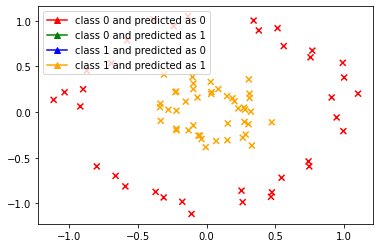

Test set


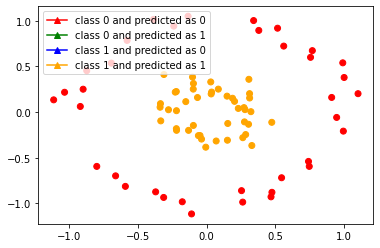

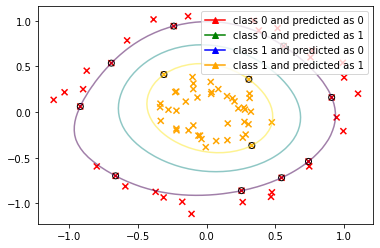

-----------------------------------------------------


In [30]:
for c in c_vals:
    print("C Value : ", c)
    apply_svm_classifier(X,Y,'rbf', c)
    print('-----------------------------------------------------')
    # Insert your code here to experiment RBF kernel with different regularization constant values
    

# Observation
We observe that the results improves as regularisation parameter is increased.

The regularization parameter (lambda) serves as a degree of importance that is given to miss-classifications. SVM pose a quadratic optimization problem that looks for maximizing the margin between both classes and minimizing the amount of miss-classifications. However, for non-separable problems, in order to find a solution, the miss-classification constraint must be relaxed. 

But for a separable problem, the higher the regularization parameter better will be the fitting.



# COMPAS Recedivism dataset

Now that you have worked with synthetic 2D datasets and got yourself familiarised with SVM's, it's time to get your hands dirty working with a real world high dimensional dataset.

COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism).




# Preprocessing the data

We have to load the data from CSV file. Except for **specifying the file path**, you need not have to do any changes to the block below.


---

**1 Point**

---



In [31]:
# Specify the path of your COMPAS dataset CSV file as a string here
csv_path = 'compas-scores-raw.csv'

# Don't modify anything from here
# Load dataset
data_set = pd.read_csv(csv_path)

# Drop unimportant columns 
data_set.drop(["Person_ID", "AssessmentID","AssessmentReason","Case_ID","LastName","FirstName","MiddleName","DateOfBirth","Screening_Date","IsCompleted","IsDeleted","Language","RawScore","DecileScore","AssessmentType"], axis = 1, inplace = True) 
# Display the modified dataset
data_set 


,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet_ID,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,ScoreText
0,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,Low
1,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,Low
2,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,18,Risk of Failure to Appear,Low
3,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Low,7,Risk of Violence,Low
4,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Low,8,Risk of Recidivism,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,Probation,Male,African-American,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Medium with Override Consideration,8,Risk of Recidivism,High
60839,Probation,Male,African-American,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Medium with Override Consideration,18,Risk of Failure to Appear,High
60840,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,Low
60841,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,Medium


In [32]:
# Preprocessing continued...
# Don't make any changes to this block
# Transforming the ScoreText into 0, 1, 2, 3
data_set['ScoreText'] = data_set['ScoreText'].map({'Low': 1, 'Medium': 2, 'High': 3})

df_s= pd.DataFrame(data_set.ScoreText)

for index in df_s.index:
     if df_s.iloc[index].ScoreText!=1:
        if df_s.iloc[index].ScoreText!=2:
          if df_s.iloc[index].ScoreText!=3:
            df_s.iloc[index].ScoreText=0

df = pd.DataFrame(data_set)

df.ScoreText=df_s.astype(int)

# Printing number of points corresponding to each class
print(len(df[df['ScoreText'] == 0]))
print(len(df[df['ScoreText'] == 1]))
print(len(df[df['ScoreText'] == 2]))
print(len(df[df['ScoreText'] == 3]))


45
41487
12488
6823


## Histograms Visualization

---


Plot a histogram between the race (Ethnic_Code_Text) and the mean score (ScoreText).


---

**1 Point**

---



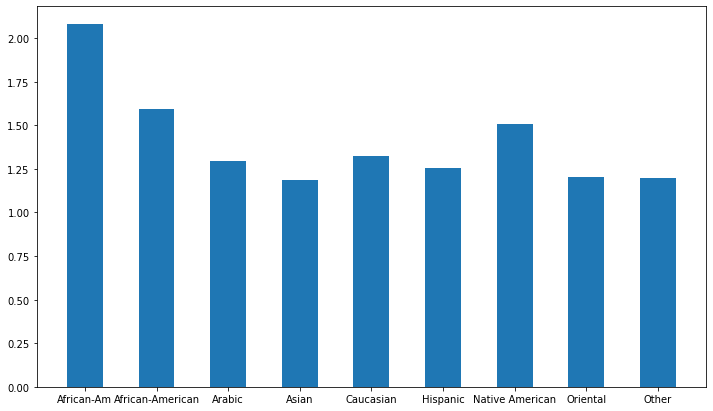

In [33]:
# Insert your code here to plot a histogram by grouping race (Ethnic_Code_Text) and the mean score (ScoreText)
fig, axis = plt.subplots(figsize = (12,7))
mean_hist_display = df.groupby('Ethnic_Code_Text').mean()
plt.bar(mean_hist_display.index, mean_hist_display.ScoreText, width=0.5)
plt.show()

Plot a histogram between the legal status (LegalStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

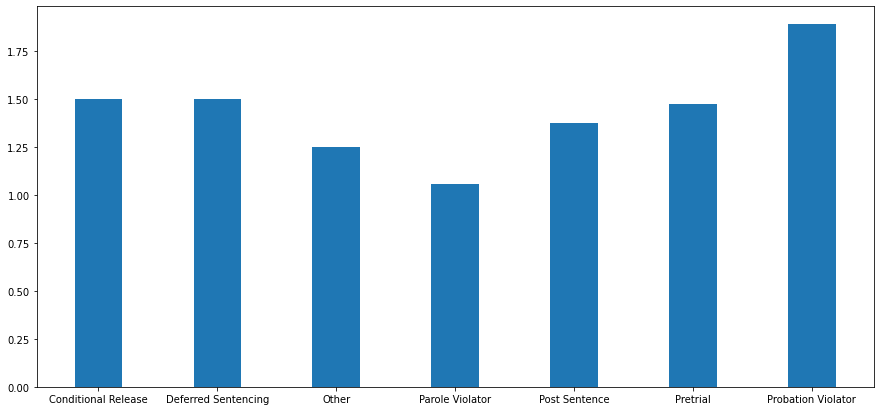

In [34]:
# Insert your code here to plot a histogram by grouping legal status (LegalStatus) and the mean score (ScoreText)
fig, axis = plt.subplots(figsize = (15,7))
mean_hist_display = df.groupby('LegalStatus').mean()
plt.bar(mean_hist_display.index, mean_hist_display.ScoreText, width=0.4)
plt.show()

Plot a histogram between the display text (DisplayText) and the mean score (ScoreText).


---

**1 Point**

--- 

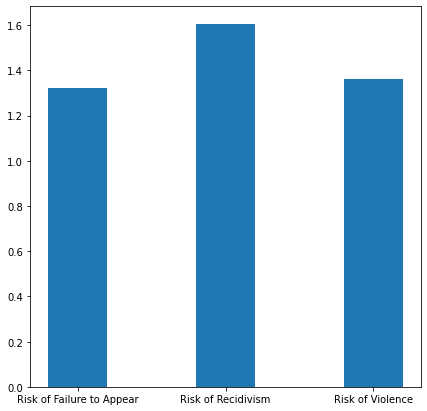

In [35]:
# Insert your code here to plot a histogram by grouping display text (DisplayText) and the mean score (ScoreText)
fig, axis = plt.subplots(figsize = (7,7))
mean_hist_display = df.groupby('DisplayText').mean()
plt.bar(mean_hist_display.index, mean_hist_display.ScoreText, width=0.4)
plt.show()

Plot a histogram between the marital status (MaritalStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

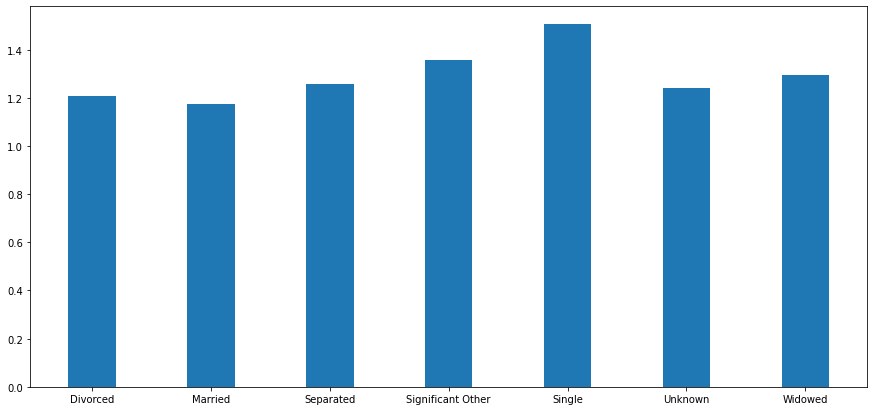

In [36]:
# Insert your code here to plot a histogram by grouping marital status (MaritalStatus) and the mean score (ScoreText)
fig, axis = plt.subplots(figsize = (15,7))
mean_hist_display = df.groupby('MaritalStatus').mean()
plt.bar(mean_hist_display.index, mean_hist_display.ScoreText, width=0.4)
plt.show()

Plot a histogram between the recidivism supervision level (RecSupervisionLevelText) and the mean score (ScoreText).


---

**1 Point**

--- 

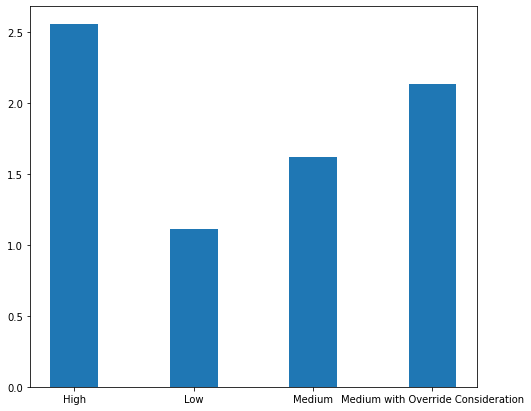

In [37]:
# Insert your code here to plot a histogram by grouping recidivism supervision level (RecSupervisionLevelText) and the mean score (ScoreText)
fig, axis = plt.subplots(figsize = (8,7))
mean_hist_display = df.groupby('RecSupervisionLevelText').mean()
plt.bar(mean_hist_display.index, mean_hist_display.ScoreText, width=0.4)
plt.show()

Plot a histogram between the custody status (CustodyStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

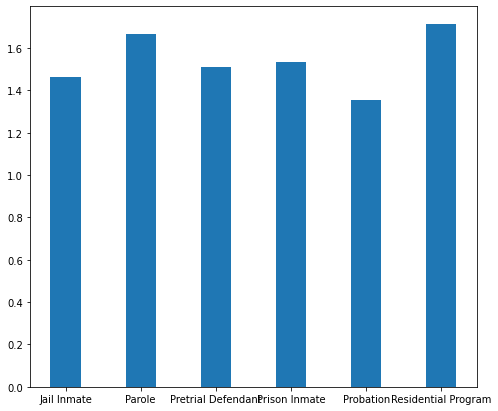

In [38]:
# Insert your code here to plot a histogram by grouping custody status (CustodyStatus) and the mean score (ScoreText)
fig, axis = plt.subplots(figsize = (8,7))
mean_hist_display = df.groupby('CustodyStatus').mean()
plt.bar(mean_hist_display.index, mean_hist_display.ScoreText, width=0.4)
plt.show()

## Discretizing categorical attributes


---

As we have categorical attributes, we have to map them to a set of discrete values for processing by SVM. **Please don't make any changes to the block below.**



In [39]:
# Transforming the Agency_Text into 0, 1, 2, 3
data_set['Agency_Text'] = data_set['Agency_Text'].map({'DRRD': 0, 'PRETRIAL': 1, 'Probation': 2, 'Broward County':3}).astype(int)
# Transforming the Gender into 0 and 1
data_set['Sex_Code_Text'] = data_set['Sex_Code_Text'].map({'Male': 0, 'Female': 1}).astype(int)
# Transforming the Ethnic_Code_Text into 0, 1, 2, 3, 4, 5, 6, 7,8
data_set['Ethnic_Code_Text'] = data_set['Ethnic_Code_Text'].map({'Caucasian': 0, 'African-American': 1, 'Hispanic': 2, 'Arabic':3, 'Asian':4,'Native American':5,'Oriental':6 , 'African-Am':7,'Other': 8}).astype(int)
# Transforming the LegalStatus into 0, 1, 2, 3, 4, 5,6 
data_set['LegalStatus'] = data_set['LegalStatus'].map({'Pretrial': 0, 'Post Sentence': 1, 'Conditional Release':2,'Deferred Sentencing':3,'Parole Violator':4,'Probation Violator':5,'Other': 6}).astype(int)
# Transforming the CustodyStatus into 0, 1, 2, 3, 4, 5
data_set['CustodyStatus'] = data_set['CustodyStatus'].map({'Jail Inmate': 0, 'Probation': 1, 'Pretrial Defendant': 2, 'Parole':3, 'Prison Inmate': 4, 'Residential Program':5}).astype(int)
# Transforming the marital status into 0, 1, 2, 3, 4, 5, 6
data_set['MaritalStatus'] = data_set['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2,'Separated':3,'Significant Other':4,'Unknown':5,'Widowed':6}).astype(int)

data_set




,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet_ID,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,ScoreText
0,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,7,Risk of Violence,1
1,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,8,Risk of Recidivism,1
2,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,18,Risk of Failure to Appear,1
3,1,0,0,22,Risk and Prescreen,0,0,1,1,Low,7,Risk of Violence,1
4,1,0,0,22,Risk and Prescreen,0,0,1,1,Low,8,Risk of Recidivism,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,2,0,1,22,Risk and Prescreen,0,0,0,3,Medium with Override Consideration,8,Risk of Recidivism,3
60839,2,0,1,22,Risk and Prescreen,0,0,0,3,Medium with Override Consideration,18,Risk of Failure to Appear,3
60840,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,7,Risk of Violence,1
60841,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,8,Risk of Recidivism,2


## Correlation matrix visualization


---

Plot a heatmap of the correlation matrix for all attributes. You may use the `seaborn` library.

---

**4 Points**

---



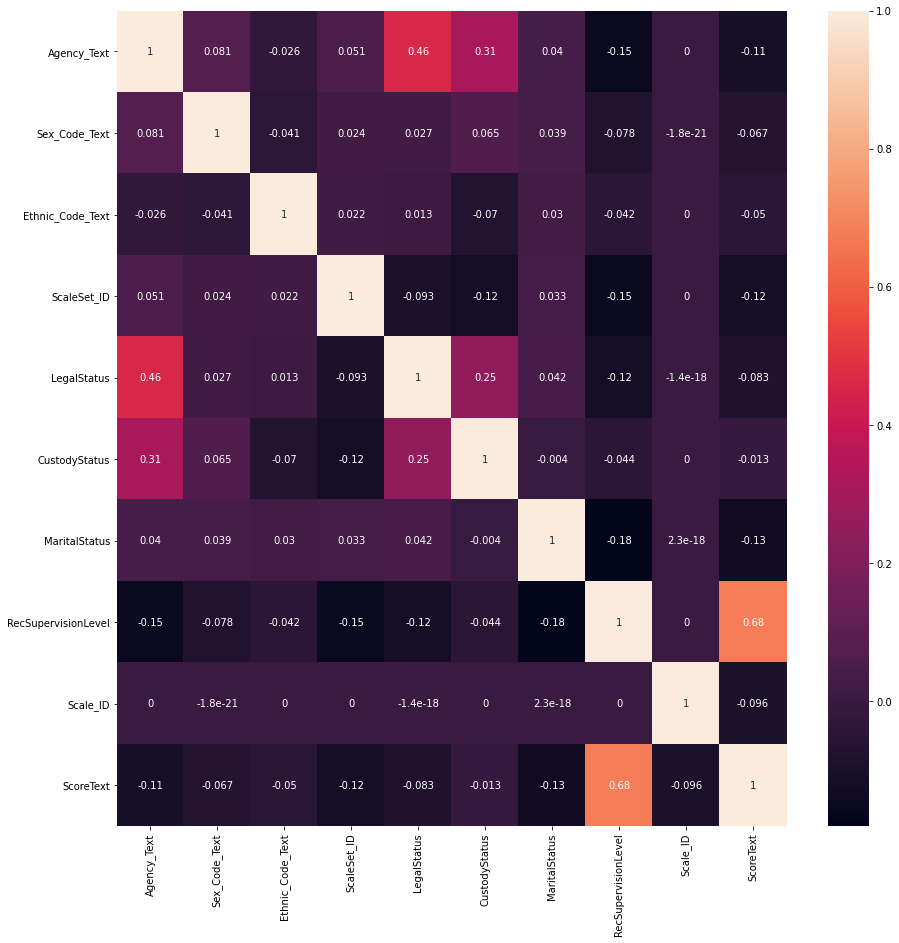

In [40]:
# Insert your code here to plot the correlation matrix heatmap
plt.figure(figsize=(15,15))
correlation_matrix = data_set.corr() # Pairwise Correlation
sns.heatmap(correlation_matrix,annot=True)
plt.show()


Consider only the attribute that has highest correlation with the target attribute `ScoreText`. Construct a reduced 1 dimensional dataset. Split it into train and test sets keeping 20% of the total data as the test set.

---

**3 Points**

---



In [41]:

# Insert your code here to construct reduced 1D dataset
correlation_matrix['ScoreText'][:-1].sort_values()
top_ = correlation_matrix['ScoreText'][:-1][-1:].keys()
print("Highest Correlation : " , top_)
X = data_set[top_].values

# Insert your code here to consider target attribute Y which is ScoreText attribute
Y = data_set['ScoreText'].values

# Insert your code here to split the dataset into train and test sets.
# Keep 20% of the total data as test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42 , test_size = 0.2)


Highest Correlation :  Index(['Scale_ID'], dtype='object')



We have 4 classes in our target attribute. Such multi class classification via SVM can be considered as binary classification in One Vs. Rest (OR) One Vs. One fashion. Use “one-vs-the-rest” SVC for classification. Justify its effect on the score obtained.


---

**4 Points**

---



In [0]:
def support_vector_count(list_):
    print("Class Wise Support Vector Count")
    for i in range(len(list_)):
        print("Class ", i , ":", list_[i] )
    print()


In [43]:
# Insert your code here to instantiate the One Vs Rest SVM classifier
clf = SVC(decision_function_shape='ovr', kernel='linear')

# Insert your code here to fit the One Vs rest classifier on the training set
clf.fit(X_train, y_train)

# Insert your code here to print the number of support vectors for each class

support_vector_count(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
print ("Accuracy on Test Set : ", accuracy_score(y_test, clf.predict(X_test) ) )


Class Wise Support Vector Count
Class  0 : 34
Class  1 : 9975
Class  2 : 9974
Class  3 : 5469

Accuracy on Test Set :  0.6812392143972389


#Observation : 
Accuracy is 68 percentage, using ovr scheme with linear kernel.

Repeat the same with One Vs One classification scheme. Justify its effect on the score obtained.

---

**4 Points**

---



In [44]:
# Insert your code here to instantiate a One Vs One SVM classifier with linear kernel
clf = SVC(decision_function_shape='ovo', kernel='linear')

# Insert your code here to train the One Vs One classifier using the training set
clf.fit(X_train, y_train)

# Insert your code here to print the number of support vectors for each class
support_vector_count(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
print ("Accuracy on Test Set : ", accuracy_score(y_test, clf.predict(X_test) ) )


Class Wise Support Vector Count
Class  0 : 34
Class  1 : 9975
Class  2 : 9974
Class  3 : 5469

Accuracy on Test Set :  0.6812392143972389


# Observation
Accuracy obtained is same as the previos one  i.e 68 percentage.  
Also, number of support vectors obtained are same because both are learning linear boundary and might be ending up learning similar classifiers.


Use “one-against-one” SVM classifier with RBF kernel for classification. Justify its effect on the score obtained.

---

**4 Points**

---



In [45]:
# Insert your code here to instantiate a One Vs One SVM classifier with RBF kernel
clf = SVC(decision_function_shape='ovo', kernel='rbf')

# Insert your code here to train the One Vs One classifier with RBF kernel using the training set
clf.fit(X_train, y_train)

# Insert your code here to print the number of support vectors for each class
support_vector_count(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
print ("Accuracy on Test Set : ", accuracy_score(y_test, clf.predict(X_test) ) )

Class Wise Support Vector Count
Class  0 : 34
Class  1 : 9974
Class  2 : 9974
Class  3 : 5469

Accuracy on Test Set :  0.6812392143972389


Observation

Accuracy obtained is same as the previos one i.e 68 percentage. The number of support vectors is also same as the previous, indicating that the higher dimensionality of rbf was of no-use as with respect to the "top" feature used, the data must be linearly separable.

Lets take some more features in decreasing order of correlation with ScoreText and check its effect on the score. Take top-7 correlated attributes and divide the data in 80:20 (train:test) fashion as done above.

---

**3 Points**

---





In [46]:
# Insert your code here to construct the reduced dataset by taking top 7 most correlated attributes with the target attribute (ScoreText)
correlation_matrix['ScoreText'][:-1].sort_values()
top_ = correlation_matrix['ScoreText'][:-1][-7:].keys()
print("Highest Correlation : " , top_)
X = data_set[top_].values


# Insert your code here to consider target attribute Y which is ScoreText attribute
Y = data_set['ScoreText'].values

# Insert your code here to split the dataset into train and test sets.
# Keep 20% of the total data as test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)

Highest Correlation :  Index(['Ethnic_Code_Text', 'ScaleSet_ID', 'LegalStatus', 'CustodyStatus',
       'MaritalStatus', 'RecSupervisionLevel', 'Scale_ID'],
      dtype='object')


Use SVM One Vs One classifier with linear kernel for classification and justify the increase or decrease in the score and number of support vectors.


---

**4 Points**

---





In [47]:
# Insert your code here to instantiate a One Vs One SVM classifier with linear kernel
clf = SVC(decision_function_shape='ovo', kernel='linear')

# Insert your code here to train the One Vs One classifier using the training set
clf.fit(X_train, y_train)

# Insert your code here to print the number of support vectors for each class
support_vector_count(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
print ("Accuracy on Test Set : ", accuracy_score(y_test, clf.predict(X_test) ) )

Class Wise Support Vector Count
Class  0 : 34
Class  1 : 9310
Class  2 : 9974
Class  3 : 3377

Accuracy on Test Set :  0.7262716739255485


# Observation 
Accuracy is 72 percentage using ovo scheme with linear kernel, which is not satisfactry. It is due to fact that the data are not linearly separable.



Repeat the same with RBF kernel and justify the increase or decrease in the score and number of support vectors.

---

**4 Points**

---



In [48]:
# Insert your code here to instantiate a One Vs One SVM classifier with RBF kernel
clf = SVC(decision_function_shape='ovo', kernel='rbf')

# Insert your code here to train the One Vs One classifier with RBF kernel using the training set
clf.fit(X_train, y_train)

# Insert your code here to print the number of support vectors for each class
support_vector_count(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
print ("Accuracy on Test Set : ", accuracy_score(y_test, clf.predict(X_test) ) )

Class Wise Support Vector Count
Class  0 : 34
Class  1 : 8824
Class  2 : 9972
Class  3 : 3390

Accuracy on Test Set :  0.8216780343495768


# Observation 
Accuracy is 82 percentage using ovo scheme with rbf kernel. RBF due to its high dimensionality fits well rather than linear one. Also, due to well fitting (as compared to previos approaches), the number of support vectors decreases.
